# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):

    X_train_centered = X_train - np.mean(X_train, axis=0)

    U_train, singular_values, Vt_matrix = np.linalg.svd(X_train_centered, full_matrices=False)

    U_train_reduced = U_train[:, :n_components]
    singular_values_reduced = np.diag(singular_values[:n_components])
    Vt_reduced = Vt_matrix[:n_components, :]

    X_train_reduced = np.dot(U_train_reduced, singular_values_reduced)

    X_test_centered = X_test - np.mean(X_test, axis=0)

    X_test_reduced = np.dot(X_test_centered, Vt_reduced.T)

    return X_train_reduced, X_test_reduced, Vt_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [20, 40, 80, 160, 800]

svd_results = []

print("Training models with different SVD components")

for components in svd_components:
    print(f" SVD with {components} components...")

    X_train_svd, X_test_svd, Vt_reduced_train = apply_svd_custom(X_train, X_test, components)

    model_accuracy, model_training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    svd_results.append({
        'components': components,
        'accuracy': model_accuracy,
        'training_time': model_training_time
    })

    print(f"SVD components: {components}, Accuracy: {model_accuracy:.4f}, Training time: {model_training_time:.4f} seconds")


Training models with different SVD components
 SVD with 20 components...
SVD components: 20, Accuracy: 0.8786, Training time: 3.4791 seconds
 SVD with 40 components...
SVD components: 40, Accuracy: 0.9023, Training time: 9.0026 seconds
 SVD with 80 components...
SVD components: 80, Accuracy: 0.9170, Training time: 33.4162 seconds
 SVD with 160 components...
SVD components: 160, Accuracy: 0.9197, Training time: 78.3988 seconds
 SVD with 800 components...
SVD components: 800, Accuracy: 0.9209, Training time: 621.8055 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


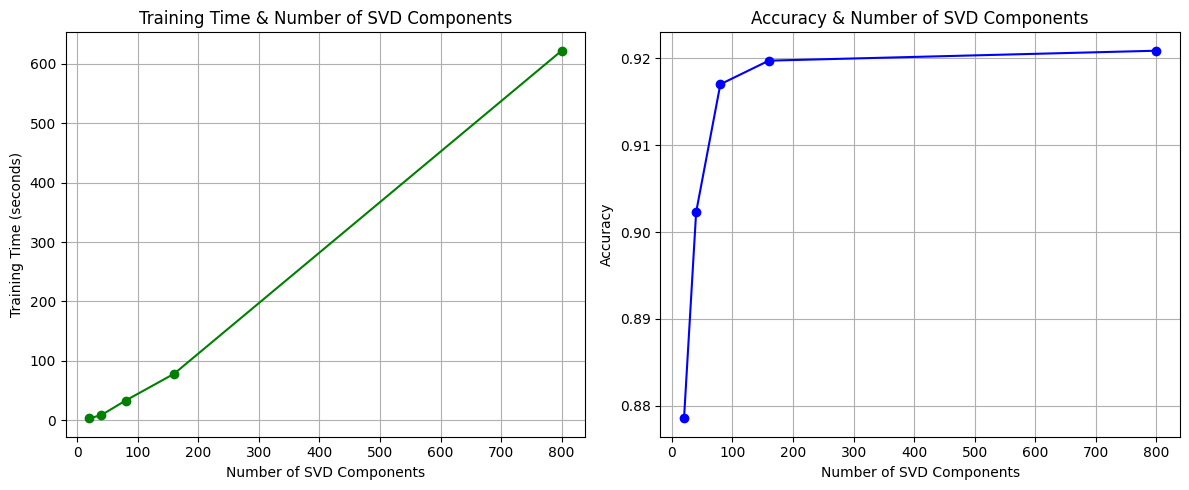

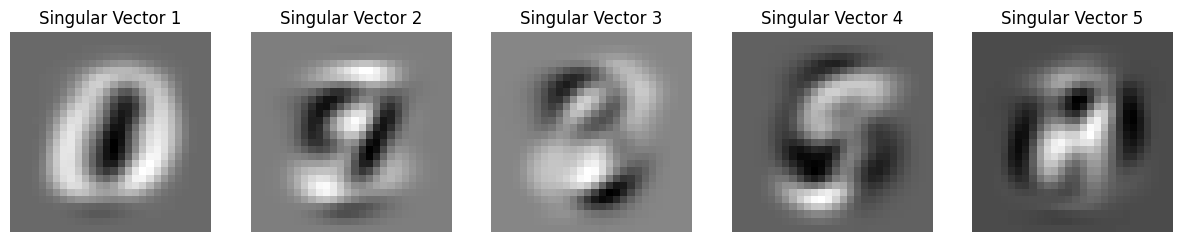

In [ ]:
import matplotlib.pyplot as plt

components_list = [result['components'] for result in svd_results]
accuracy_list = [result['accuracy'] for result in svd_results]
training_time_list = [result['training_time'] for result in svd_results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components_list, training_time_list, marker='o', linestyle='-', color='g')
plt.title('Training Time & Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Accuracy & Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

def visualize_singular_vectors(Vt_train_reduced, n_vectors=5):
    fig, axes = plt.subplots(1, n_vectors, figsize=(15, 3))
    for i in range(n_vectors):
        singular_vector_image = Vt_train_reduced[i].reshape(28, 28)
        axes[i].imshow(singular_vector_image, cmap='gray')
        axes[i].set_title(f'Singular Vector {i+1}')
        axes[i].axis('off')
    plt.show()

visualize_singular_vectors(Vt_reduced_train, n_vectors=5)

## Part 6: Analyze / Conclusion

YOUR ANSWER:

Training Time & Number of SVD Components: This figure shows that as the number of SVD components increases, the training time also increases in a nearly linear fashion. This indicates that higher components leads to longer training times.

Accuracy & Number of SVD Components: We see that accuracy improves rapidly as the number of SVD components increases, but after around 100-200 components, the accuracy plateaus, suggesting diminishing returns beyond this point.